In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('C:/Users/Vidush/Desktop/MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting G:/Backup/Root Dir/Udemy Courses/Python for Data Science and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting G:/Backup/Root Dir/Udemy Courses/Python for Data Science and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting G:/Backup/Root Dir/Udemy Courses/Python for Data Science and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting G:/Backup/Root Dir/Udemy Co

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
mnist.train.images[4].shape

(784,)

In [24]:
mnist.train.images[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
mnist.train.images[4].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

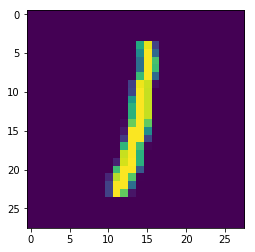

In [26]:
plt.imshow(mnist.train.images[4].reshape(28,28))

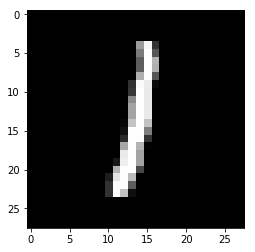

In [29]:
plt.imshow(mnist.train.images[4].reshape(28,28), cmap='gist_gray')

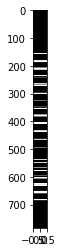

In [22]:
plt.imshow(mnist.train.images[1].reshape(784,1), cmap='gist_gray', aspect = 0.02)

In [30]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [31]:
W = tf.Variable(tf.zeros([784,10]))

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
b = tf.Variable(tf.zeros([10]))

In [33]:
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [34]:
b

<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>

In [35]:
y = tf.matmul(x,W) + b

In [36]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [37]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [39]:
train = optimizer.minimize(cross_entropy)

In [40]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.921
